<center> <h1> Photoisomerization Kinetics Analysis using Python </h1> </center>

### Overview
1. [Introduction](#1.-Introduction)
2. [Minimal background for python](#2.-Minimal-background-for-python)
3. [Import data](#3.-Import-data)
4. [Analyze data - Approach 1](#4.-Analyze-data---Approach-1)
5. [Analyze data - Approach 2](#5.-Analyze-data---Approach-2)

---

## 1. Introduction

This page gives a walk through for analyzing the spectrum data (photoisomerization of trans-azobenzene to cis-azobenzene) using python. 

It should be pointed out that the reaction rate at room temperature is significantly faster than what can be monitored using the equipment available.  The reaction takes several minutes to complete because only a small percentage of azobenzene molecules actually absorb a photon.

![](https://yyrcd-1256568788.cos.na-siliconvalley.myqcloud.com/yyrcd/2019-10-16-180145.jpg)

<p style="text-align: center; font-size: 13px; font-family: times">
    <span style="font-weight: bold;">Figure 1. </span> 
    Photoisomerization of azobenzene
</p>

As shown in figure 2, the absorption spectrum changes as azobenzene isomerizes from the trans to the cis isomer.
![](https://yyrcd-1256568788.cos.na-siliconvalley.myqcloud.com/yyrcd/2019-10-16-180309.jpg)
<p style="text-align: center; font-size: 13px; font-family: times">
    <span style="font-weight: bold;">Figure 2. </span> 
    Example data showing the change in the absorption spectrum as a function of time.
</p>

Assuming this reaction is first order, we can fit the system to a single exponential of the form


$$ c_t=c_0e^{-k\:t}$$

Where $c_t$ is the concentration of trans-azobenzene at time t, $c_0$ is the concentration of trans-azobenzene at t = 0, and k is the rate constant of the reaction.

<p style="color:red"><b>The goal is to quantify k, using the data presented in figure 2.</b></p>


##### 1. Approach 1

As we know Beer's Law, Concentration-related (c) problem could be transformed to Absorbance-related (A) one.
<Br>
    
$$ A = \epsilon l c $$

As A is propotional to c, we could also get the following (Where $A_t$ is the Absorbance at time t, $A_0$ is the Absorbance at t = 0)

<br>

$$ A_t =A_0 e^{-k\:t}$$

Since the equation above will approaches 0 at infinity, but the absorption at 250nm - 350nm will never be 0, because both isomers absorb at this wavelength range.   
So we add a constant `n` at the end, which is a baseline correction factor.  
And treat $A_0$ also as as a constant, here we name it `m`.
<br>

$$ A_t =m \; e^{-k\:t} + n \tag {Eq1}$$

So the data at 300nm in all spectrums should behave as an exponential curve (as below)

![](https://yyrcd-1256568788.cos.na-siliconvalley.myqcloud.com/yyrcd/2019-10-16-203544.jpg)
<p style="text-align: center; font-size: 13px; font-family: times">
    <span style="font-weight: bold;">Figure 3. </span> 
</p>
We could get k by fitting this curve to Eq1.

##### 2. Approach 2

In approach 1, we only use the data at 300nm, what if we want to use all the datapoints to get a more precise fitting?

Any line between initial and final spectrum could be written as a combination of initial and final line.

`a` here we call it scale factor.

$$ \text{combined}= a \;\text {initial} + (1 - a) \;\text {final}$$

![](https://yyrcd-1256568788.cos.na-siliconvalley.myqcloud.com/yyrcd/2019-10-16-192901.jpg)
<p style="text-align: center; font-size: 13px; font-family: times">
    <span style="font-weight: bold;">Figure 4. </span> 
</p>

We will fit each spectrum using initial and final spectrum. Then we will have a scale factor (a) for each spectrum. (like the data below)
![](https://yyrcd-1256568788.cos.na-siliconvalley.myqcloud.com/yyrcd/2019-10-16-200127.jpg)
<p style="text-align: center; font-size: 13px; font-family: times">
    <span style="font-weight: bold;">Figure 5. </span> 
</p>

The equation of `a` over time is inferred at below.  
The A here is one line (absorbance from 250nm to 550nm), not one single point.

$$A_{Initial} = A_0 e^{-k  t_I} $$
$$A_{Final} = A_0 e^{-k  t_F}$$
$$A_{Middle} = A_0 e^{-kt}$$
<br>

$$A_{Middle} = a A_{Initial} + (1 - a) A_{Final}$$
$$ = a A_0 e^{-k  t_I} + (1 - a) A_0 e^{-k  t_F} $$
$$ = a A_0 e^{-k  t_I}  + A_0 e^{-k  t_F} - a A_0 e^{-k  t_F}$$
$$ = A_0 e^{-k  t_F} + a A_0  ( e^{-k  t_I}  - e^{-k  t_F})$$
<br>

$$A_{Middle} = A_0 e^{-k  t_F} + a A_0  (e^{-k  t_I} - e^{-k  t_F}) =  A_0 e^{-k t}$$
<br>

$$a = \dfrac{e^{-k t} - e^{-k t_F}}{e^{-k t_I} - e^{-k t_F}}$$

As $e^{-k t_F}$ and $e^{-k t_I}$ are constants, the equation could also be written as a form of Exponential Equation

<br>

$$ a =m \; e^{-k\:t} + n \tag {Eq2}$$
We could get k by fitting the curve on Figure 5 to Eq2.

---

## 2. Minimal background for python

[Minimal Background for Python](https://yyrcd-1256568788.cos.na-siliconvalley.myqcloud.com/yyrcd/2019-10-18-Minimal%20Background%20for%20Python-1.html)

1. Basic data types
2. Containers
3. Control Flow
4. Functions
5. Numpy
6. Matplotlib
7. Scipy


---

## 3. Import data

In [1]:
import numpy as np                     # scientific computing, which provide multidimensional array object and tools
import pandas as pd                    # extracting data from txt or csv file
import os                              # dealing with other files, like the data folder
from scipy.optimize import minimize    # fitting tool
from matplotlib import pyplot as plt   # plotting
%matplotlib inline

In [2]:
def extract_data_from_txt(file, wave_range=(250, 550)):
    """
    Extract wavenumber and absorbance data from a single txt file with range specified.

    Parameters
    -------
    file : location of the txt file
    wave_range : (tuple) range of the wavenumber needed,
    default is (250, 550)

    Returns
    -------
    wavenumber : array
    absorbance : array
    """
    data = pd.read_csv(file, skiprows=13, sep='\t', header=None)  # skip first 13 lines
    range_mask = data[0].between(wave_range[0], wave_range[1], inclusive=True)
    data = data[range_mask]  # select the data with range specified
    wavenumber = data[0].values
    absorbance = data[1].values
    return wavenumber, absorbance

##### Note: 
In this page, we assume all the data file (`sample_led_Absorbance_0****.txt`) is under the `data/` foler.  
the `data/` folder should be at the same directory as this notebook (photoisomerization.ipynb) file.  
For example, the path to `initial spectrum file` is `'data/sample_led_Absorbance_00001.txt'`

#### The Structure should looks like: 
<pre>
photoisomerization/  
├── data  
│   ├── sample_led_Absorbance_00001.txt  
│   ├── sample_led_Absorbance_0.....txt  
│   └── sample_led_Absorbance_05400.txt  
└── photoisomerization.ipynb  
</pre>

Let's take a look of the initial spectrum

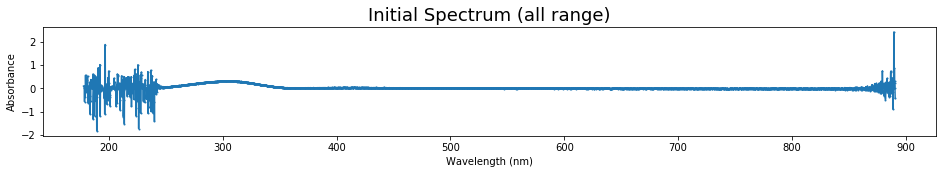

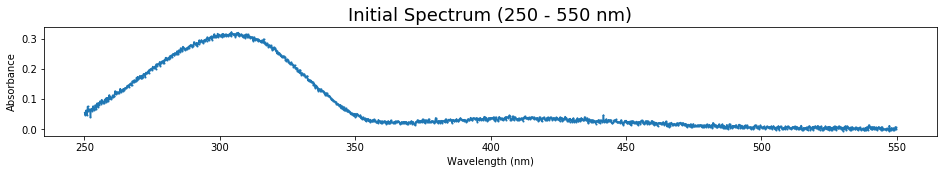

In [3]:
# all range
wavenumber, absorbance = extract_data_from_txt('data/sample_led_Absorbance_00001.txt', wave_range=(0, 1000))

plt.figure(figsize=(16, 2))
plt.plot(wavenumber, absorbance, 'o-', markersize=1, label='Absorbance')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Initial Spectrum (all range)',  fontsize=18)
plt.show()

# range: 250nm - 550nm
wavenumber, absorbance = extract_data_from_txt('data/sample_led_Absorbance_00001.txt', wave_range=(250, 550))

plt.figure(figsize=(16, 2))
plt.plot(wavenumber, absorbance, 'o-', markersize=1, label='Absorbance')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Initial Spectrum (250 - 550 nm)',  fontsize=18)
plt.show()

In this example we have totally 5399 spectrum, which are collected every 0.1s.  
Let's take a look how all of them looks like.

In [4]:
filenames = sorted(os.listdir('data'))
num_files = len(filenames)
num_files

5339

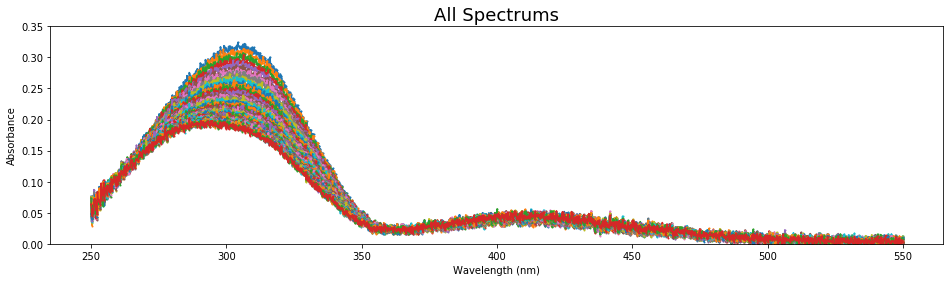

In [5]:
plt.figure(figsize=(16, 4))

for i in range(0, num_files, 100):
    file = 'data/' + filenames[i]
    wavenumber, absorbance = extract_data_from_txt(file)
    plt.plot(wavenumber, absorbance, 'o-', markersize=1)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.ylim(0, 0.35)
plt.title('All Spectrums',  fontsize=18)
plt.show()

---

## 4. Analyze data - Approach 1

Absorbance at 300nm for all spectrums (which are collected every 0.1s)

In [6]:
absorbances_300nm = []
times = []

for i in range(0, num_files, 1):
    file = 'data/' + filenames[i]
    wavenumber, absorbance = extract_data_from_txt(file, wave_range=(300, 301))
    absorbances_300nm.append(absorbance[0])
    times.append(i/10)

times = np.array(times)

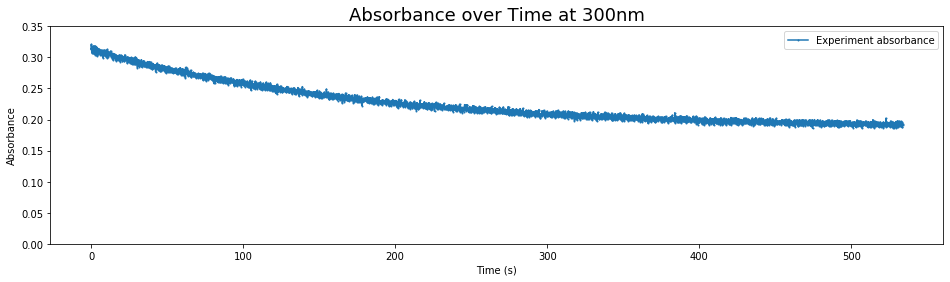

In [7]:
plt.figure(figsize=(16, 4))
plt.plot(times, absorbances_300nm, 'o-', markersize=1, label='Experiment absorbance')
plt.xlabel('Time (s)')
plt.ylabel('Absorbance')
plt.ylim(0, 0.35)
plt.legend()
plt.title('Absorbance over Time at 300nm',  fontsize=18)
plt.show()

Fit the curve of `absorbance over time at 300nm` to exponential function

In [8]:
def exponential(t, m, k, n):
    return m * np.exp(- k * t) + n

In [9]:
def loss_abs300nm_fittedcurve(para):
    pred = exponential(t=times, m=para[0], k=para[1], n=para[2])
    mse = np.mean((absorbances_300nm - pred)**2)  # mean_squared_error
    return mse

result1 = minimize(loss_abs300nm_fittedcurve, x0=np.array([1.0, 1.0, 1.0]), method='Nelder-Mead')
para1 = result1.x
print('Optimized parameters:\nm: {:.4f} k: {:.6f} n: {:.4f} \n'.format(para1[0], para1[1], para1[2]))
print('Optimization Info: \n', result1)

Optimized parameters:
m: 0.1272 k: 0.005621 n: 0.1856 

Optimization Info: 
  final_simplex: (array([[0.12721424, 0.00562121, 0.18555581],
       [0.12711529, 0.00562475, 0.18560433],
       [0.12712325, 0.00562972, 0.18563406],
       [0.1271318 , 0.00561695, 0.18556405]]), array([7.49254924e-06, 7.49278820e-06, 7.49288823e-06, 7.49320709e-06]))
           fun: 7.492549241131205e-06
       message: 'Optimization terminated successfully.'
          nfev: 340
           nit: 189
        status: 0
       success: True
             x: array([0.12721424, 0.00562121, 0.18555581])


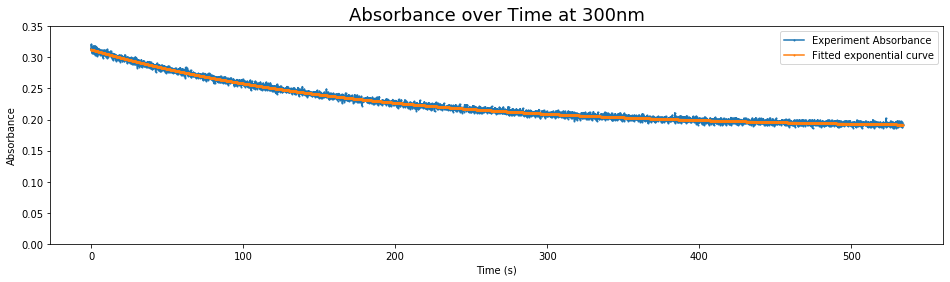

In [10]:
plt.figure(figsize=(16, 4))
plt.plot(times, absorbances_300nm, 'o-', markersize=1, label='Experiment Absorbance')
plt.plot(times, exponential(t=times, m=result1.x[0], k=result1.x[1], n=result1.x[2]), 'o-', markersize=1, label='Fitted exponential curve')
plt.xlabel('Time (s)')
plt.ylabel('Absorbance')
plt.ylim(0, 0.35)
plt.legend()
plt.title('Absorbance over Time at 300nm',  fontsize=18)
plt.show()

In [11]:
print('fitted k is : {:.6f}'.format(para1[1]))

fitted k is : 0.005621


---

## 5. Analyze data - Approach 2

In [12]:
absorbance_datas = []

for i in range(0, num_files, 1):
    file = 'data/' + filenames[i]
    wavenumber, absorbance = extract_data_from_txt(file)
    absorbance_datas.append(absorbance)

In [13]:
def combine_initial_final(a):
    initial = absorbance_datas[0]
    final = absorbance_datas[-1]
    comb = a * initial + (1 - a) * final
    return comb

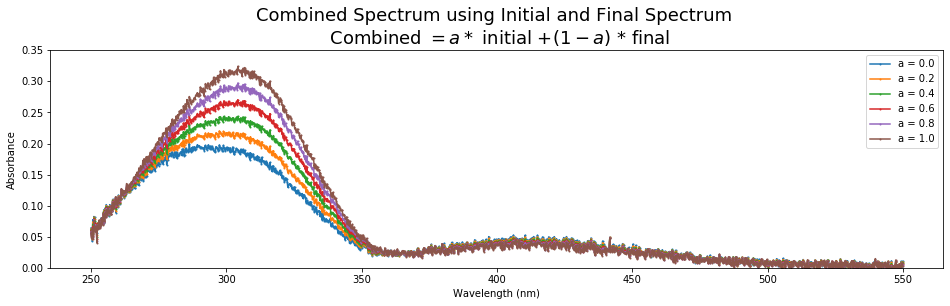

In [14]:
plt.figure(figsize=(16, 4))

for i in np.arange(0, 1.1, 0.2):
    absorbance = combine_initial_final(i)
    plt.plot(wavenumber, absorbance, 'o-', markersize=1, label='a = {:.1f}'.format(i))

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.ylim(0, 0.35)
plt.legend()
plt.title('Combined Spectrum using Initial and Final Spectrum \n Combined $= a * $ initial $+ (1 - a)$ * final',  fontsize=18)
plt.show()

In [15]:
true_spectrum = absorbance_datas[0]

def loss_scale(a):
    pred_spectrum = combine_initial_final(a)
    mse = np.mean((true_spectrum - pred_spectrum)**2)  # mean_squared_error
    return mse

In [16]:
fitted_a = []

for i in range(0, num_files, 1):
    true_spectrum = absorbance_datas[i]
    result = minimize(loss_scale, x0=np.array([0]), method='Nelder-Mead')
    fitted_a.append(result.x[0])

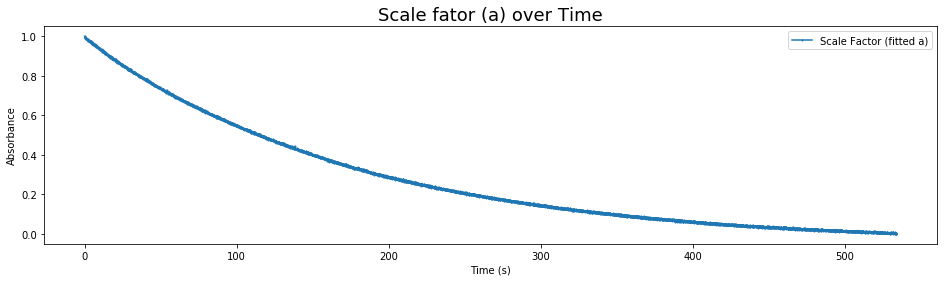

In [17]:
plt.figure(figsize=(16, 4))
plt.plot(times, fitted_a, 'o-', markersize=1, label='Scale Factor (fitted a)')
plt.xlabel('Time (s)')
plt.ylabel('Absorbance')
plt.legend()
plt.title('Scale fator (a) over Time', fontsize=18)
plt.show()

In [18]:
def loss_scale_fittedcurve(para):
    pred = exponential(t=times, m=para[0], k=para[1], n=para[2])
    mse = np.mean((fitted_a - pred)**2)  # mean_squared_error
    return mse

result2 = minimize(loss_scale_fittedcurve, x0=np.array([1, 0.1, 1]), method='Nelder-Mead')
para2 = result2.x
print('Optimized parameters:\nm: {:.4f} k: {:.6f} n: {:.4f} \n'.format(para2[0], para2[1], para2[2]))
print('Optimization Info: \n', result2)

Optimized parameters:
m: 1.0420 k: 0.005613 n: -0.0501 

Optimization Info: 
  final_simplex: (array([[ 1.04200706,  0.00561256, -0.05005893],
       [ 1.04193979,  0.0056107 , -0.0501338 ],
       [ 1.04197118,  0.00561052, -0.05014177],
       [ 1.0420674 ,  0.00561122, -0.05015597]]), array([6.92673172e-06, 6.92694986e-06, 6.92701347e-06, 6.92767864e-06]))
           fun: 6.926731716786898e-06
       message: 'Optimization terminated successfully.'
          nfev: 276
           nit: 155
        status: 0
       success: True
             x: array([ 1.04200706,  0.00561256, -0.05005893])


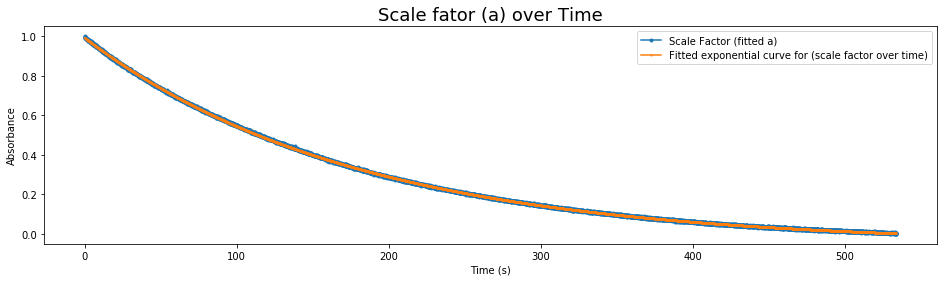

In [19]:
plt.figure(figsize=(16, 4))
plt.plot(times, fitted_a, 'o-', markersize=3, label='Scale Factor (fitted a)')
plt.plot(times, exponential(t=times, m=para2[0], k=para2[1], n=para2[2]), 'o-', markersize=1, label='Fitted exponential curve for (scale factor over time)')
plt.xlabel('Time (s)')
plt.ylabel('Absorbance')
plt.legend()
plt.title('Scale fator (a) over Time',  fontsize=18)
plt.show()

In [20]:
print('fitted k is : {:.6f}'.format(para2[1]))

fitted k is : 0.005613
